# Word Cloud Generator

Note: this code (specifically cells 2 and 3) is 100% tailored to the static output from the Qualtrics survey from the fall. Obviously would need to be updated to reflect the output from edX. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud # https://github.com/amueller/word_cloud
import seaborn as sns

In [2]:
# combine all qualititative answers from specific columns
# to make one 'book' where each list item is a combination of 
# one person's answers to each question.

def make_docs(cols,df):
    docs = []
    rows = df.shape[0]
    small = df[cols]
    
    for row in range(2,rows):
        # ignore NaN
        temp = [str(i) for i in small.loc[row] if len(str(i)) > 3]
        joined = " ".join(temp)
        
        docs.append(joined)
    return docs

# generate word cloud

def wcloud(doc, title):
    wc = WordCloud(background_color = "white").generate(doc)
    plt.imshow(wc, interpolation = "bilinear")
    plt.title(title)
    plt.axis("off")
    plt.show()
    

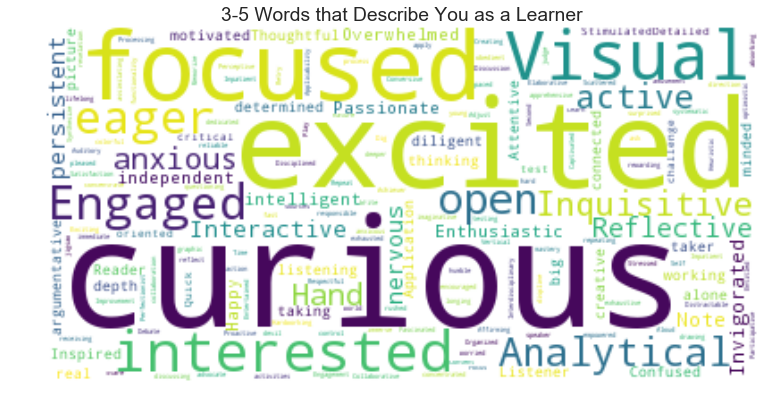

In [3]:
sns.set_context("poster")

# Import data (specific to Qualtrics output)
raw_data = pd.read_csv("master.csv")

# column names where adjectives are found
cols = ["Q237_1","Q237_2","Q237_3","Q237_4","Q237_5"]

# combine all words into one document
top_words = " ".join(make_docs(cols,raw_data))

# generate cloud
wcloud(top_words, "3-5 Words that Describe You as a Learner")